當前工作目錄 ==> /home/jovyan/IGP-01-student
the python version is 3.7.10


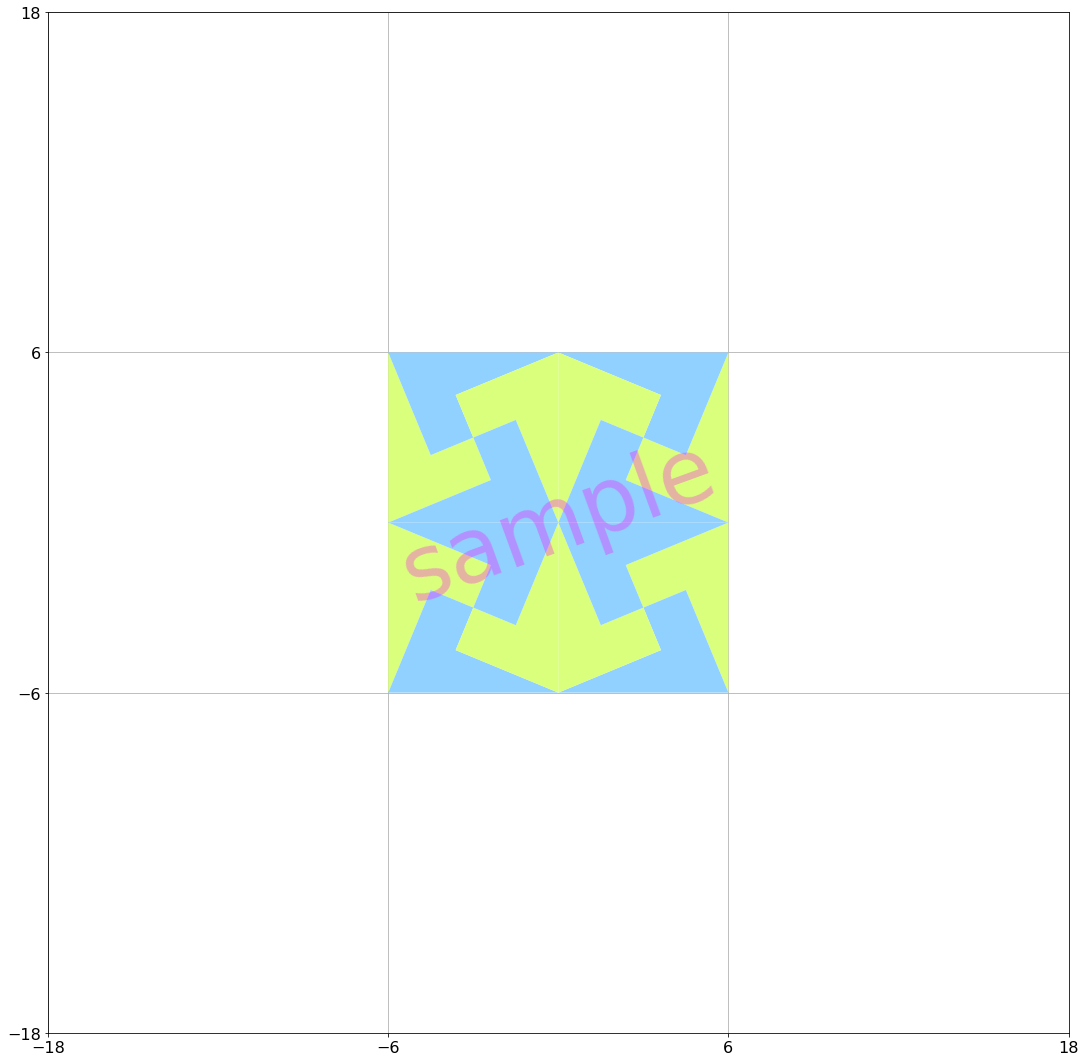

In [2]:
# (home)/IGP-01-student/
# IGP-01-3A
# 2021-09-27
#
# python 3.8.10
# run on replit.com
# run on mybinder.org
#
# python 3.9.1
# run on miniconda 3 JupyterLab
#
# 要執行本程式, 請按上方run▶
#
import os
path = os.getcwd()
print('當前工作目錄 ==>', path)
# to fix matplotlib warning
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
from platform import python_version
print('the python version is', python_version())
#
import numpy as np
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plt
#
from shapely import affinity
from shapely.geometry  import LineString, Point, Polygon
#
# ------------------------------------------------------
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def shapely_Arc(cxy, r, start_angle, end_angle) :

    numsegments = 720
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
#
# end of def
#
def motif_line(LS, MYcolor, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=MYcolor, alpha=1.0, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
def polygon_fill(poly, color, ZORDER, Alpha) :
    #
    xs, ys = poly.exterior.coords.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
# ------------------------------------------------------------------------------------------------
#
# tup7 is type of Tuple, have 7 indexed value
#
tup7 = set_graphic_area(36, 36)  
fig = plt.figure(figsize=(tup7[0], tup7[1])) # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
ax = fig.add_subplot(1,1,1)   # 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(-tup7[6]/2, tup7[6]/2)    # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(-tup7[6]/2, tup7[6]/2)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [-18,-6,6,18]
yvalues = [-18,-6,6,18]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=16)
#
plt.grid(True)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# get current axes, set X,Y same ratio & scale  
plt.gca().set_aspect('equal', adjustable='box')
#
ax.text(0.5, 0.5, 'sample', transform=ax.transAxes,
        fontsize=90, color='magenta', alpha=0.3,
        ha='center', va='center', rotation='20', zorder=30)
#
plt.savefig("./png/3A-0.png",format="png",dpi=150, facecolor='white')
#
cxy = (0,0)
r0 = 0.08
r1 = 3
cir_1 = shapely_Arc((r1,-r1), 2*r1,  0, 360)  
#
line_AC = LineString([(r1,-r1), (-r1, r1)])
line_BD = LineString([(r1, r1), (-r1,-r1)])
#
its_01 = line_AC.intersection(cir_1)
r2 = its_01.distance(Point(0,0))
cir_2 = shapely_Arc(cxy, r2,  0, 360)
#
cir_A = shapely_Arc(( r1,-r1), r2,  0, 360)
cir_B = shapely_Arc(( r1, r1), r2,  0, 360)
cir_C = shapely_Arc((-r1, r1), r2,  0, 360)
cir_D = shapely_Arc((-r1,-r1), r2,  0, 360)
#
its_02 = line_BD.intersection(cir_2)[0]
its_02_xy = (its_02.x, its_02.y)
cir_3 = shapely_Arc(its_02_xy, r0,  0, 360)
#
line_A_02 = LineString([(r1,-r1), its_02_xy])
p1_xy = ( r1-r2, r1)
p2_xy = (-r1+r2,-r1)
line_p1_p2 = LineString([p1_xy, p2_xy])
#
its_03 = line_p1_p2.intersection(line_A_02)
its_03_xy = (its_03.x, its_03.y)
cir_4 = shapely_Arc(its_03_xy, r0,  0, 360)
#
leg_1 = LineString([(r1,-r1), its_03_xy, cxy])
leg_2 = affinity.rotate(leg_1, 90, cxy)
leg_3 = affinity.rotate(leg_1,180, cxy)
leg_4 = affinity.rotate(leg_1,270, cxy)
#
its_04 = affinity.rotate(its_03, 90, cxy)
its_04_xy = (its_04.x, its_04.y)
#
color_1 = (218/255, 255/255, 124/255)
color_2 = (145/255, 209/255, 255/255)
#
polygon_1_xy = [(r1,-r1), its_03_xy, cxy, its_04_xy, (r1, r1), (r1,-r1)]
polygon_1 = Polygon(polygon_1_xy)
polygon_2 = affinity.rotate(polygon_1, 90, cxy)
polygon_3 = affinity.rotate(polygon_1,180, cxy)
polygon_4 = affinity.rotate(polygon_1,270, cxy)
#
RU_polygon_1 = affinity.translate(polygon_1, 3, 3, 0)
RU_polygon_2 = affinity.translate(polygon_2, 3, 3, 0)
RU_polygon_3 = affinity.translate(polygon_3, 3, 3, 0)
RU_polygon_4 = affinity.translate(polygon_4, 3, 3, 0)
#
polygon_fill(RU_polygon_1, color_1, 20, 1)
polygon_fill(RU_polygon_2, color_2, 20, 1)
polygon_fill(RU_polygon_3, color_1, 20, 1)
polygon_fill(RU_polygon_4, color_2, 20, 1)
#
# define reflection matrix for shapely
#
reflect_about_Xaxis  = [ 1, 0, 0,-1, 0,0]   # Affine2D(np.array([[ 1, 0, 0], [0,-1, 0], [0, 0, 1]]))
reflect_about_Yaxis  = [-1, 0, 0, 1, 0,0]   # Affine2D(np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]]))
reflect_about_Origin = [-1, 0, 0,-1, 0,0]   # Affine2D(np.array([[-1, 0, 0], [0,-1, 0], [0, 0, 1]]))
#
# 以Y軸為反射軸, 將Y軸右側現有圖元, 反射至Y軸左側
# xxxx_refY = affinity.affine_transform(xxxx, reflect_about_Yaxis)
# 
LU_polygon_1 = affinity.affine_transform(RU_polygon_1, reflect_about_Yaxis)
LU_polygon_2 = affinity.affine_transform(RU_polygon_2, reflect_about_Yaxis)
LU_polygon_3 = affinity.affine_transform(RU_polygon_3, reflect_about_Yaxis)
LU_polygon_4 = affinity.affine_transform(RU_polygon_4, reflect_about_Yaxis)
#
polygon_fill(LU_polygon_1, color_1, 20, 1)
polygon_fill(LU_polygon_2, color_2, 20, 1)
polygon_fill(LU_polygon_3, color_1, 20, 1)
polygon_fill(LU_polygon_4, color_2, 20, 1)
#
RD_polygon_1 = affinity.affine_transform(RU_polygon_1, reflect_about_Xaxis)
RD_polygon_2 = affinity.affine_transform(RU_polygon_2, reflect_about_Xaxis)
RD_polygon_3 = affinity.affine_transform(RU_polygon_3, reflect_about_Xaxis)
RD_polygon_4 = affinity.affine_transform(RU_polygon_4, reflect_about_Xaxis)
#
polygon_fill(RD_polygon_1, color_1, 20, 1)
polygon_fill(RD_polygon_2, color_2, 20, 1)
polygon_fill(RD_polygon_3, color_1, 20, 1)
polygon_fill(RD_polygon_4, color_2, 20, 1)
#
LD_polygon_1 = affinity.rotate(RU_polygon_1, 180, cxy)
LD_polygon_2 = affinity.rotate(RU_polygon_2, 180, cxy)
LD_polygon_3 = affinity.rotate(RU_polygon_3, 180, cxy)
LD_polygon_4 = affinity.rotate(RU_polygon_4, 180, cxy)
#
polygon_fill(LD_polygon_1, color_1, 20, 1)
polygon_fill(LD_polygon_2, color_2, 20, 1)
polygon_fill(LD_polygon_3, color_1, 20, 1)
polygon_fill(LD_polygon_4, color_2, 20, 1)
#
plt.savefig("./png/3A-1.png",format="png",dpi=150, facecolor='white')
#